In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm import tqdm
from pathlib import Path

N_experiments = 100
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']


In [7]:
# 'trajectory', 'pose', 'crashed', 'time_alive', 'trajectory_legendre', 'trajectory_monomial', 'total_reward_wo_survival', 'total_reward'

key = "total_reward"

def get_data(ckpt, key, normalize=False):
    results = torch.load(ckpt)
    
    metric_mean = []
    for exp in range(N_experiments):    
        scale = results[exp]['time_alive'] if normalize else 1
        metric_mean.append(results[exp][key]/scale)
    metric_mean = np.array(metric_mean).mean()    
    iterations = int(str(ckpt).split('/')[-1].split('_')[1].split('.')[0])
    return [iterations, metric_mean]

random_folder_CTRL = '/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/legeval/CTRLSAC/Isaac-Quadcopter-legtrain-Trajectory-Direct-v0/'
random_directory_CTRL = Path(random_folder_CTRL)
random_performance_CTRL = []
for ckpt in tqdm(list(random_directory_CTRL.iterdir())):
    random_performance_CTRL.append(get_data(ckpt, key, normalize=True))
    
random_performance_CTRL = np.array(random_performance_CTRL)
random_performance_CTRL = random_performance_CTRL[random_performance_CTRL[:, 0].argsort()]


random_folder_SAC = '/home/naliseas-workstation/Documents/anaveen/IsaacLab/runs/experiments/legeval/SAC/Isaac-Quadcopter-legtrain-Trajectory-Direct-v0/'
random_directory_SAC = Path(random_folder_SAC)
random_performance_SAC = []
for ckpt in tqdm(list(random_directory_SAC.iterdir())):
    random_performance_SAC.append(get_data(ckpt, key, normalize=True))
    
random_performance_SAC = np.array(random_performance_SAC)
random_performance_SAC = random_performance_SAC[random_performance_SAC[:, 0].argsort()]


100%|██████████| 50/50 [00:02<00:00, 20.07it/s]


In [3]:
def compute_ma_vec(vec):
    window_width = 20
    cumsum_vec = np.cumsum(np.insert(vec, 0, 0)) 
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return ma_vec



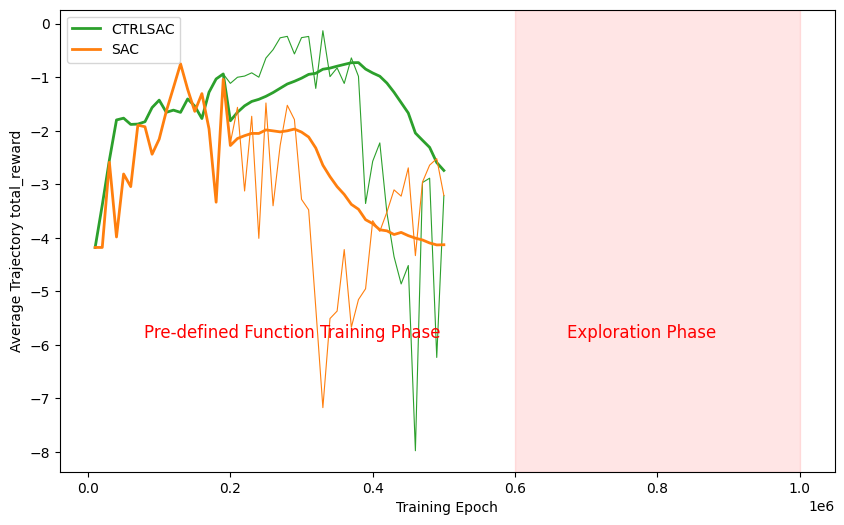

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))

random_training_iterations_CTRL = random_performance_CTRL[:, 0]
random_performance_CTRL_ = (random_performance_CTRL[:, 1])

random_training_iterations_SAC = (random_performance_SAC[:, 0])
random_performance_SAC_ = (random_performance_SAC[:, 1])


ax.plot(random_training_iterations_CTRL, random_performance_CTRL_, lw = 0.8, c=colors[2])
ax.plot(random_training_iterations_CTRL, np.concatenate((random_performance_CTRL_[:19], compute_ma_vec(random_performance_CTRL_))), lw = 2, c=colors[2], label = 'CTRLSAC')

ax.plot(random_training_iterations_SAC, random_performance_SAC_, lw = 0.8, c=colors[1])
ax.plot(random_training_iterations_SAC, np.concatenate((random_performance_SAC_[:19], compute_ma_vec(random_performance_SAC_))), lw = 2, c=colors[1], label = 'SAC')


# Add tinted red background from 0.6 to 1
ax.axvspan(0.6e6, 1e6, color='red', alpha=0.1, label='_nolegend_')  # `alpha` controls the transparency

# Add a label to the shaded area
ax.text(0.75, 0.3, 'Exploration Phase', color='red', fontsize=12, ha='center', va='center', transform=ax.transAxes)

ax.text(0.3, 0.3, 'Pre-defined Function Training Phase', color='red', fontsize=12, ha='center', va='center', transform=ax.transAxes)

plt.ylabel(f'Average Trajectory {key}')
plt.xlabel('Training Epoch')
ax.legend()
